In [18]:
import pandas as pd
import json

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

from pprint import pprint

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [85]:
df = pd.read_csv('./data/bfo_df_master_20211123.csv')

lit_df = df[df['doi']!='Sutter-Fella Lab']

print("Number of recipes from literature: ", len(lit_df))

#display(lit_df)

Number of recipes from literature:  341


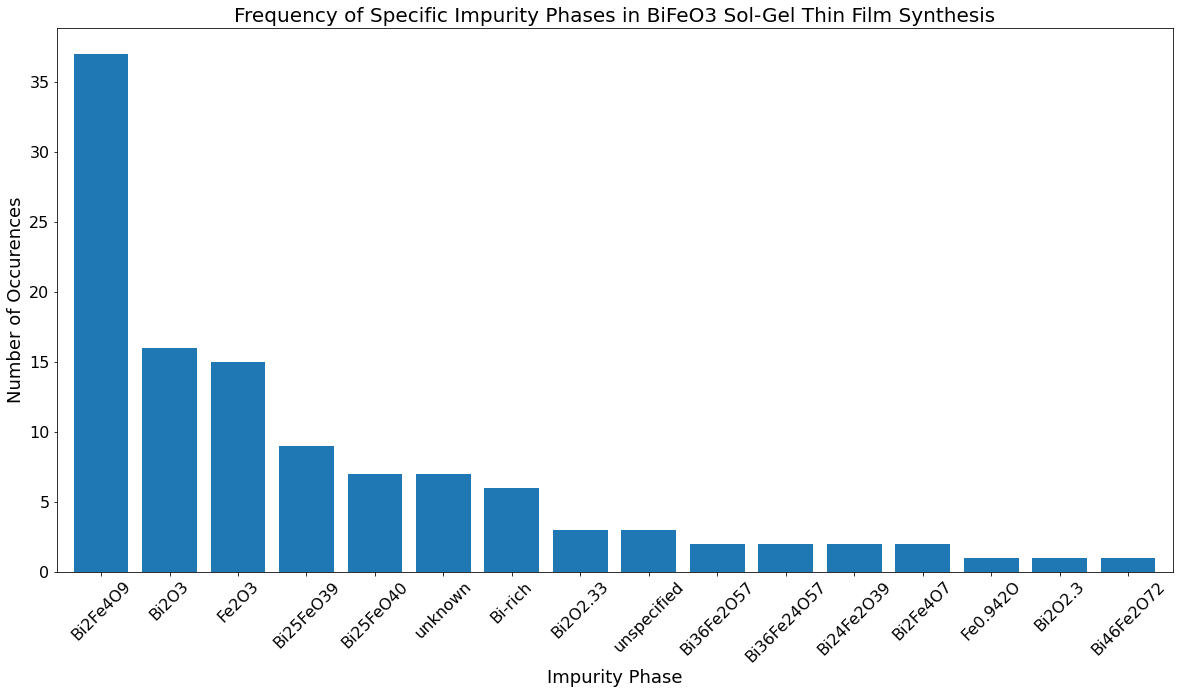

In [83]:
# Histogram of impurity phases

impurities = list(lit_df['reported_impurities'])

impurities_list = []
for rep in impurities:
    if rep != '[]':
        strings = rep[1:-1]
        imps = [imp for imp in strings.split(', ')]
        for imp in imps:
            if imp != "'amorphous'":
                impurities_list.append(imp[1:-1])
                
impurities_series = pd.Series(impurities_list)

impurities_series.replace('unkown', 'unknown', inplace=True)

impurities_series.sort_values(inplace=True)

plt.figure(figsize=(20,10))
impurities_series.value_counts().plot(kind='bar', width=0.8)
plt.title('Frequency of Specific Impurity Phases in BiFeO3 Sol-Gel Thin Film Synthesis', fontsize=20)
plt.xlabel('Impurity Phase', fontsize=18)
plt.ylabel('Number of Occurences', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

In [70]:
# 2-way Venn diagram for solvents

solvents = {
    '2_methoxyethanol' : 0,
    'ethylene_glycol' : 0,
    'both' : 0
}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)

for solv1, solv2 in zip(solvs1, solvs2):
    if solv1 and solv1 not in solvents.keys():
        solvents[solv1] = 0
    if solv2 and solv2 not in solvents.keys():
        solvents[solv2] = 0
        
    if solv1 and solv2:
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvents['both'] += 1
        else:
            solvents[solv1] += 1
            solvents[solv2] += 1
    elif solv1 and not solv2:
        solvents[solv1] += 1
    elif not solv1 and solv2:
        solvents[solv2] += 1

pprint(solvents)

{'2_ethoxyethanol': 5,
 '2_methoxyethanol': 240,
 'acetic_acid': 1,
 'both': 26,
 'ethanol': 3,
 'ethylene_glycol': 57,
 'formamide': 1,
 'nitric_acid': 12,
 'nn_dimethylformamide': 3,
 'polyethylene_glycol': 1,
 'propionic_acid': 2,
 'propylene_glycol': 1,
 'trimethylene_glycol': 1,
 'water': 1}


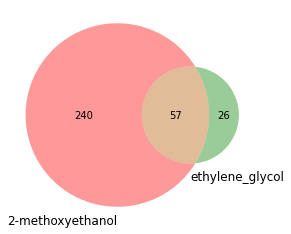

In [25]:
venn2(
    subsets=(
        solvents['2_methoxyethanol'],
        solvents['both'],
        solvents['ethylene_glycol']), 
    set_labels=('2-methoxyethanol', 'ethylene_glycol'))

In [28]:
# 2-way Venn diagram for chelating agents

In [29]:
# 3-way Venn diagram for solvents and acetic acid

In [30]:
# 3-way Venn diagram for solvents and citric acid